In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense


In [46]:
max_features = 10000  
maxlen = 500  
batch_size = 32


In [47]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

In [48]:
translate = imdb.get_word_index()
translate

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [49]:
i_dont_have_idea = {}
for word, key in translate.items():
     i_dont_have_idea[key] = word


In [50]:

example = ''
for el in input_test[5]:
    if el != 0:
        example += f' {i_dont_have_idea[el]}'

example

" the watching boy couch as on interesting never aunt an like did as on real reception badly to shiny of purchased but that eyed average one in exploitation that them final realistic taxi but shock was does dvd to shock this as on off is very together to was fantastic scares some such badly victims maybe as on are year it's are unknown this factor assured they there's was fantastic life think taxi as it is alexander very on to real at life who an of production this of actually believes then also in can that to was two from real that real they there's at maybe those are of journey as on thing met is 8 and that fairly of now 10 watching any years as on into at are year"

In [51]:
input_train = pad_sequences(input_train, maxlen=500)
input_test = pad_sequences(input_test, maxlen=500)
input_test



array([[   0,    0,    0, ...,   14,    6,  717],
       [   0,    0,    0, ...,  125,    4, 3077],
       [  33,    6,   58, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]])

In [52]:
model = Sequential()
model.add(keras.layers.InputLayer((500,)))
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Вова\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [54]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(input_train, y_train, epochs=3, batch_size=128, validation_split=0.3)

Epoch 1/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - acc: 0.5967 - loss: 0.6585 - val_acc: 0.7312 - val_loss: 0.5526
Epoch 2/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - acc: 0.8008 - loss: 0.4643 - val_acc: 0.8212 - val_loss: 0.4186
Epoch 3/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - acc: 0.8843 - loss: 0.2928 - val_acc: 0.8403 - val_loss: 0.3846


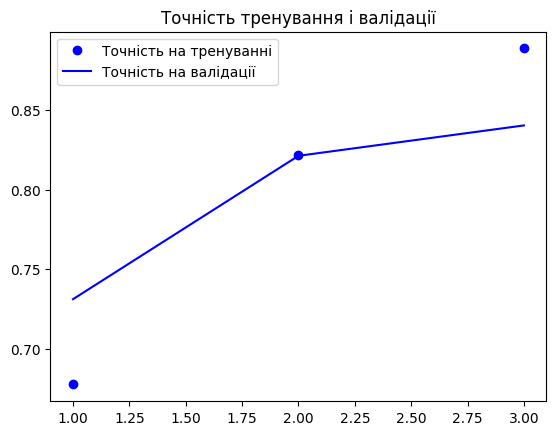

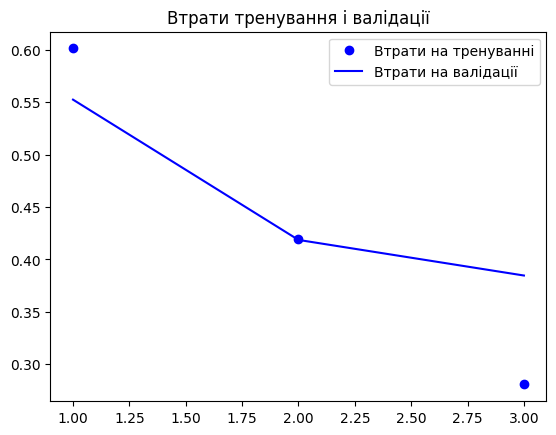

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show() 


In [57]:
model.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.8345 - loss: 0.3993


[0.3951546549797058, 0.8359599709510803]

In [58]:
model = Sequential()
model.add(keras.layers.InputLayer((500,)))
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(keras.layers.LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile(optimizer=keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['acc'])

In [60]:
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model.fit(input_train, y_train, epochs=3, batch_size=128, validation_split=0.3)



Epoch 1/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - acc: 0.6336 - loss: 0.6412 - val_acc: 0.8277 - val_loss: 0.4016
Epoch 2/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - acc: 0.8728 - loss: 0.3189 - val_acc: 0.8756 - val_loss: 0.3051
Epoch 3/3
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - acc: 0.9216 - loss: 0.2169 - val_acc: 0.8731 - val_loss: 0.3044


C:\Users\Вова\AppData\Local\Temp\ipykernel_19888\516497777.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Точність на тренуванні', color='red')
C:\Users\Вова\AppData\Local\Temp\ipykernel_19888\516497777.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Точність на валідації', color='red')
C:\Users\Вова\AppData\Local\Temp\ipykernel_19888\516497777.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні', color='red')
C:\Users\Вова\AppData\Local\Temp\ipykernel_19888\516497777.py:15: UserWarning: color is redun

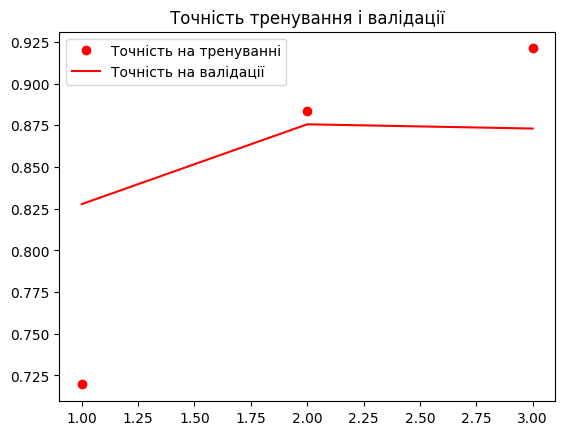

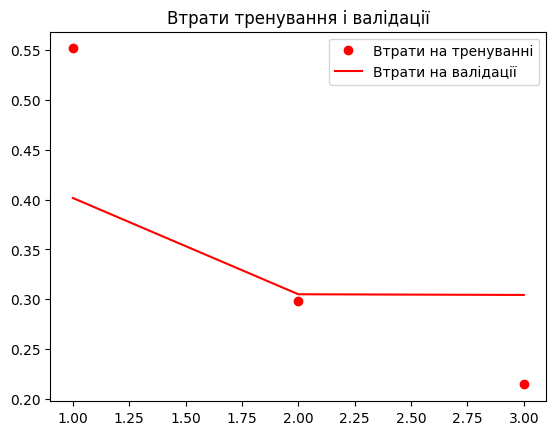

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні', color='red')  
plt.plot(epochs, val_acc, 'b', label='Точність на валідації', color='red')  
plt.title('Точність тренування і валідації') 
plt.legend() 
plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні', color='red')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації', color='red')
plt.title('Втрати тренування і валідації')
plt.legend()
plt.show()  

In [63]:
model.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - acc: 0.8662 - loss: 0.3174


[0.31768009066581726, 0.866320013999939]